#  Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
df = pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2.Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId',inplace =True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include =object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df['Ticket']

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [9]:
df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [4]:
df.drop(['Name','Ticket'],axis =1, inplace =True)

### Numerical Features

In [5]:
num = df.select_dtypes(exclude = object).columns
num

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

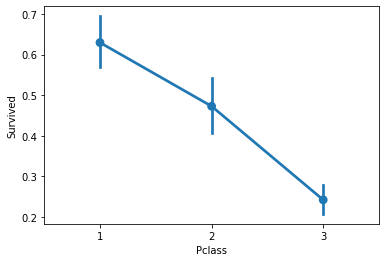

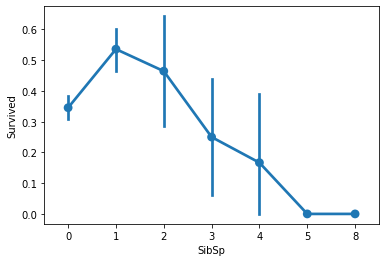

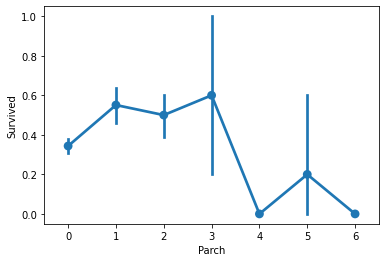

In [12]:
# Understand relation between each feature and target
for i,f in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.pointplot(data =df, x =f, y = 'Survived')

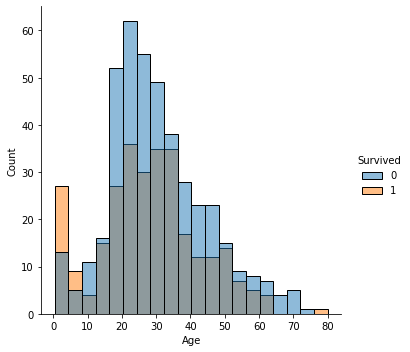

In [13]:
sns.displot(data = df, x ='Age', hue ='Survived')

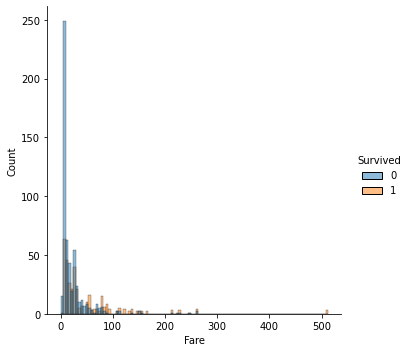

In [14]:
sns.displot(data = df, x ='Fare', hue ='Survived')

### Categorical Features

In [15]:
cat = df.select_dtypes(include =object).columns
cat

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

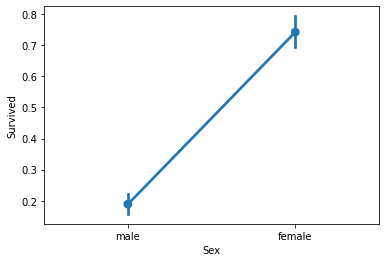

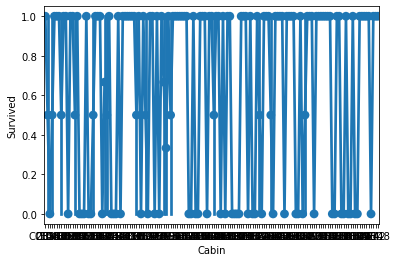

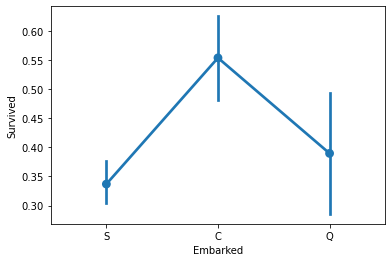

In [16]:
# Understand relation between each feature and target
for i,f in enumerate([ 'Sex', 'Cabin', 'Embarked']):
    plt.figure(i)
    sns.pointplot(data =df, x =f, y = 'Survived')

In [17]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

## 4.Fill in all the missing values present in all the columns in the dataset

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [19]:
df.shape

(891, 9)

In [20]:
df.groupby([ 'Parch'])['Age'].median()

Parch
0    30.0
1    23.0
2    16.5
3    24.0
4    42.5
5    39.0
6    43.0
Name: Age, dtype: float64

Will use the median age for ech Parch category to fill missing values in Age.

In [7]:
ages= {}
values= df.groupby([ 'Parch'])['Age'].median().tolist()
for i in range(7):
    ages[i] = values[i]
ages    

{0: 30.0, 1: 23.0, 2: 16.5, 3: 24.0, 4: 42.5, 5: 39.0, 6: 43.0}

In [8]:
for i in range(7):
    df.loc[df['Parch']==i,'Age'] = df[df['Parch']==i]['Age'].fillna(ages[i]) # select each parch rows,Age feature, fill missing value by corresp parch mean

In [23]:
df.Age.isna().sum()

0

In [24]:
df.Cabin.isna().sum()

687

In [25]:
df.Cabin.unique() # So many categories.

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
df.groupby('Pclass')['Cabin'].describe() 

,count,unique,top,freq
Pclass,,,,
1,176,133,B96 B98,4
2,16,7,F33,3
3,12,7,G6,4


In [27]:
df[df['Pclass']==1]['Cabin'].unique() # dont have a useful info to fill null values 

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', nan, 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

In [28]:
df.groupby(by = [df['Cabin'].isna()])['Survived'].mean() 

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

Only few survived with no cabin (True) and majority who survived had cabin.Will add a new feature Cabin_stat as 1 or 0 for those who had a cabin or not and drop Cabin column.

In [9]:
df['Cabin_stat'] = (~df['Cabin'].isna()).astype(int)

df[['Cabin','Cabin_stat']]

,Cabin,Cabin_stat
PassengerId,,
1,NaN,0
2,C85,1
3,NaN,0
4,C123,1
5,NaN,0
...,...,...
887,NaN,0
888,B42,1
889,NaN,0


In [11]:
df.drop('Cabin', axis =1, inplace =True)

In [13]:
# For embarked we will use mode.
mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode)

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_stat    0
dtype: int64

## 5.Check and handle outliers in at least 3 columns in the dataset

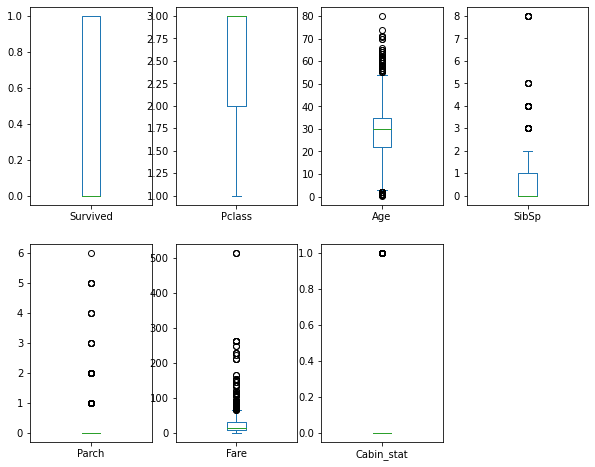

In [33]:
df.plot(kind ='box',subplots =True,layout = (2,4), sharey =False, figsize =(10,8))
plt.show()

 Outliers are present in 3 given columns. Outlier in Cabin Stat is because only a few had cabin.

### Age Outliers

In [15]:
iqr = df['Age'].quantile(.75) - df['Age'].quantile(.25)
up = df['Age'].quantile(.75) + 1.5*iqr
low = df['Age'].quantile(.25) - 1.5*iqr
AgeOutliers = df[(df['Age']<low) | (df['Age']> up)]
AgeOutliers.groupby(['Survived'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,38.0,48.131579,26.592441,1.00,55.125,59.5,64.75,74.0
1,28.0,28.827500,30.651736,0.42,0.980,2.0,58.50,80.0


Using statistics, we will cap age> up  to upper limit and age<low to lower limit.

<AxesSubplot:>

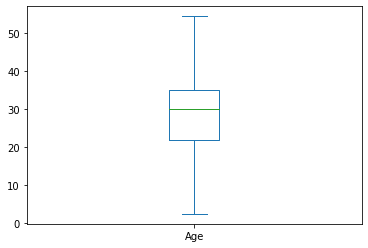

In [16]:
df.loc[df['Age']<low,'Age'] = low
df.loc[df['Age']>up,'Age'] = up
df['Age'].plot(kind ='box')

### Fare Outlier

<AxesSubplot:>

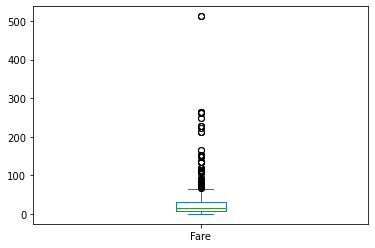

In [36]:
df['Fare'].plot(kind ='box')

In [17]:
q1= df['Fare'].quantile(.25)
q3 = df['Fare'].quantile(.75)
iqr = q3 -q1
up = q3 +1.5*iqr
print("q3,iqr,up\n",q3,iqr,up)
df[df['Fare']>up].groupby(['Survived','Sex'])['Fare'].describe()

q3,iqr,up
 31.0 23.0896 65.6344


count        mean         std      min        25%        50%  \
Survived Sex                                                                    
0        female    5.0  102.350000   44.913250  69.5500  69.550000   69.55000   
         male     32.0  114.791403   64.406333  66.6000  73.500000   79.42500   
1        female   65.0  130.020189   75.776007  66.6000  79.650000   93.50000   
         male     14.0  160.388700  150.850639  76.7292  83.669775  100.98125   

                        75%       max  
Survived Sex                           
0        female  151.550000  151.5500  
         male    118.864575  263.0000  
1        female  151.550000  512.3292  
         male    130.237500  512.3292

Among the records with outlier  fare values , fare is a factor for seggregating the survived status .So we will keep the outliers as such.

### Sibsp Outlier

<AxesSubplot:>

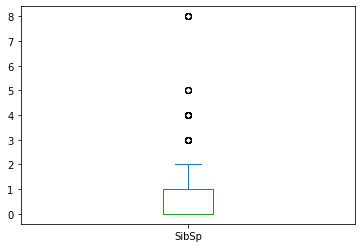

In [38]:
df['SibSp'].plot(kind ='box')

In [18]:
q1 = df['SibSp'].quantile(.25)
q3 = df['SibSp'].quantile(.75)
iqr = q3-q1
up = q3+1.5*iqr
df[df['SibSp']>up].groupby(['Survived','Sex'])['SibSp'].describe()

count      mean       std  min  25%  50%   75%  max
Survived Sex                                                        
0        female   15.0  4.400000  1.956674  3.0  3.0  4.0  4.50  8.0
         male     24.0  4.625000  1.663221  3.0  4.0  4.0  5.00  8.0
1        female    6.0  3.333333  0.516398  3.0  3.0  3.0  3.75  4.0
         male      1.0  4.000000       NaN  4.0  4.0  4.0  4.00  4.0

Majority of the records with outlier values for Sibsp didnt survive.So we will cap the Sibsp high outliers to upperlimit.

<AxesSubplot:>

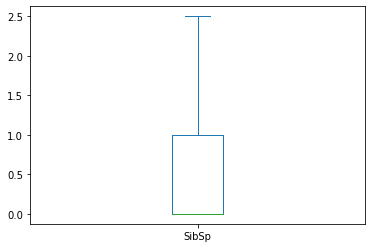

In [19]:
df.loc[df['SibSp']>up,'SibSp'] = up
df['SibSp'].plot(kind ='box')

## 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [20]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = df.drop('Survived',axis =1)
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_stat
PassengerId,,,,,,,,
1,3,male,22.0,1.0,0,7.2500,S,0
2,1,female,38.0,1.0,0,71.2833,C,1
3,3,female,26.0,0.0,0,7.9250,S,0
4,1,female,35.0,1.0,0,53.1000,S,1
5,3,male,35.0,0.0,0,8.0500,S,0


In [21]:
X['Age'] = ms.fit_transform(X[['Age']])
X['Fare'] = ms.fit_transform(X[['Fare']])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_stat
PassengerId,,,,,,,,
1,3,male,0.375000,1.0,0,0.014151,S,0
2,1,female,0.682692,1.0,0,0.139136,C,1
3,3,female,0.451923,0.0,0,0.015469,S,0
4,1,female,0.625000,1.0,0,0.103644,S,1
5,3,male,0.625000,0.0,0,0.015713,S,0


In [23]:
X = pd.get_dummies(X)

In [24]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_stat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,3,0.375000,1.0,0,0.014151,0,0,1,0,0,1
2,1,0.682692,1.0,0,0.139136,1,1,0,1,0,0
3,3,0.451923,0.0,0,0.015469,0,1,0,0,0,1
4,1,0.625000,1.0,0,0.103644,1,1,0,0,0,1
5,3,0.625000,0.0,0,0.015713,0,0,1,0,0,1


## TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [26]:
from sklearn.metrics import confusion_matrix,f1_score

## NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [30]:
ypred = clf.predict(X_test)
confusion_matrix(ypred, y_test), f1_score(ypred, y_test)

(array([[80, 18],
        [25, 56]], dtype=int64),
 0.7225806451612903)

## RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
ypred = rf.predict(X_test)
confusion_matrix(ypred, y_test), f1_score(ypred, y_test)

(array([[92, 20],
        [13, 54]], dtype=int64),
 0.7659574468085106)

## LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
confusion_matrix(ypred, y_test), f1_score(ypred, y_test)

(array([[90, 19],
        [15, 55]], dtype=int64),
 0.7638888888888888)